In [2]:
import numpy as np
import json
import math
import matplotlib.pyplot as plt
from util import cost, euclidean, visualise, matrix, greedy, radial, concentric, demandFirst

In [3]:
paths = []
with open('data/paths.txt') as f:
    paths = f.read().split('\n')
print(paths)
types = ['greedy', 'radial', 'concentric', 'low-first']

['X-n101-k25', 'X-n115-k10', 'X-n261-k13', 'X-n308-k13', 'X-n429-k61', 'X-n524-k153', 'X-n819-k171', 'X-n856-k95', 'X-n936-k151', 'X-n1001-k43']


In [7]:
paths = ['X-n101-k25', 'X-n115-k10', 'X-n261-k13', 'X-n308-k13', 'X-n429-k61', 'X-n524-k153', 'X-n819-k171', 'X-n856-k95', 'X-n936-k151']

## Make local dict

In [8]:
eval = {'initial':{'best-known':{}},'optimized':{}}
for path in paths:
    f = open('jsons/' + path + '.json')
    data = json.load(f)
    dim = data['dimension']
    demand = data['demand']
    x = data['x']
    y = data['y']
    
    print('----- ' + path + ' -----')
    print('best-known cost: ' + str(data['best-known-cost']))
    eval['initial']['best-known'][path] = data['best-known-cost']
    for type in types:
        if type not in eval['initial'].keys():
            eval['initial'][type] = {}
            eval['optimized'][type] = {}
        if 'initial' not in data[type].keys():
            print('>> no data yet')
            break
        print(type + ' initial cost: ' + str(data[type]['initial']['cost']))
        if 'optimized' not in data[type].keys():
            print('>> no optimization yet')
            break
        print(type + ' optimized cost: ' + str(data[type]['optimized']['cost']))
        eval['initial'][type][path] = data[type]['initial']['cost']
        eval['optimized'][type][path] = data[type]['optimized']['cost']

----- X-n101-k25 -----
best-known cost: 27591
greedy initial cost: 35444
greedy optimized cost: 33484
radial initial cost: 35095
radial optimized cost: 32185
concentric initial cost: 53416
concentric optimized cost: 33714
low-first initial cost: 62839
low-first optimized cost: 36631
----- X-n115-k10 -----
best-known cost: 12747
greedy initial cost: 15673
greedy optimized cost: 14593
radial initial cost: 20113
radial optimized cost: 15313
concentric initial cost: 57145
concentric optimized cost: 17262
low-first initial cost: 59084
low-first optimized cost: 30686
----- X-n261-k13 -----
best-known cost: 26558
greedy initial cost: 32331
greedy optimized cost: 29630
radial initial cost: 34224
radial optimized cost: 29834
concentric initial cost: 93533
concentric optimized cost: 32960
low-first initial cost: 151329
low-first optimized cost: 51427
----- X-n308-k13 -----
best-known cost: 25859
greedy initial cost: 35220
greedy optimized cost: 32351
radial initial cost: 34776
radial optimized c

## Visualise Performance per Initiliazing tactic

(0.0, 300000.0)

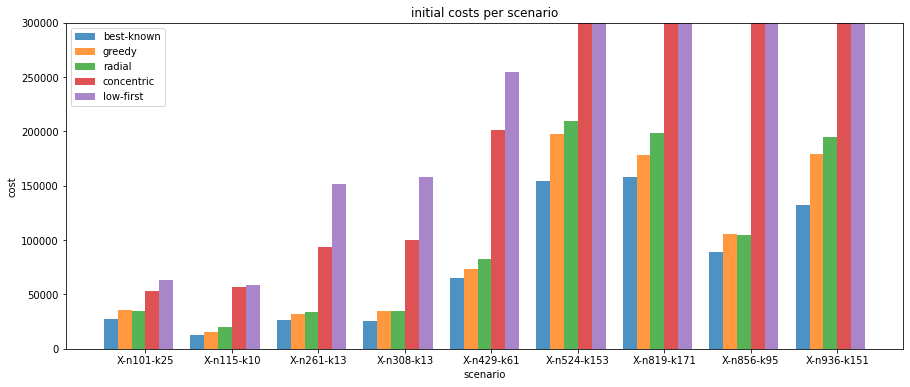

In [9]:
temptypes = list(eval['initial'].keys())
x = np.arange(len(paths))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots(figsize=(15,6))

[ax.bar(x - width/2 + i*width/len(temptypes), list(eval['initial'][temptypes[i]].values()),
               width/len(temptypes), label=temptypes[i], alpha=0.8) for i in range(len(temptypes))]

ax.set_ylabel('cost')
ax.set_xlabel('scenario')
ax.set_title('initial costs per scenario')
ax.set_xticks(x)
ax.set_xticklabels(paths)
ax.legend()
plt.ylim(ymax = 300000, ymin = 0)

(0.0, 80000.0)

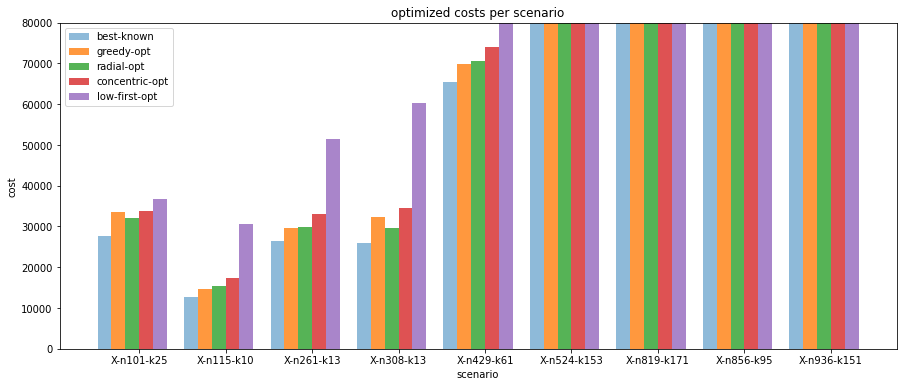

In [10]:
temptypes = list(eval['initial'].keys())
x = np.arange(len(paths))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots(figsize=(15,6))
ax.bar(x-width/2, list(eval['initial']['best-known'].values()), width/len(temptypes), label='best-known',
              alpha=0.5)
[ax.bar(x - width/2 + i*width/len(temptypes), list(eval['optimized'][temptypes[i]].values()), 
               width/len(temptypes), label=temptypes[i]+'-opt', alpha=0.8) for i in range(1,len(temptypes))]

ax.set_ylabel('cost')
ax.set_xlabel('scenario')
ax.set_title('optimized costs per scenario')
ax.set_xticks(x)
ax.set_xticklabels(paths)
ax.legend()
plt.ylim(ymax = 80000, ymin = 0)

(0.0, 230000.0)

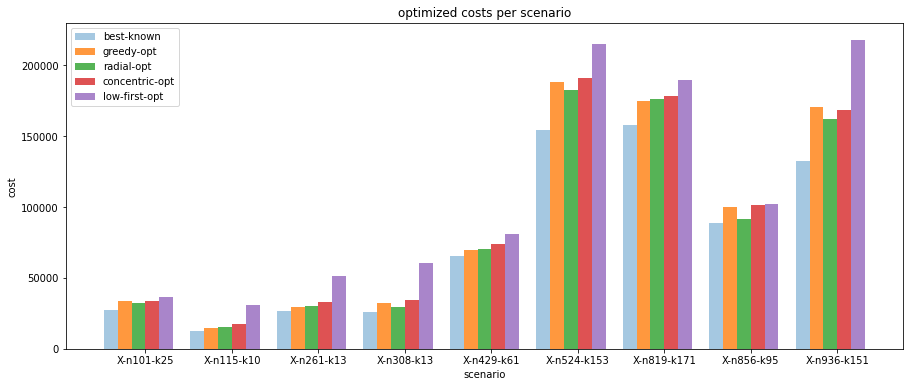

In [11]:
temptypes = list(eval['initial'].keys())
x = np.arange(len(paths))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots(figsize=(15,6))
ax.bar(x-width/2, list(eval['initial']['best-known'].values()), width/len(temptypes), label='best-known',
              alpha=0.4)
[ax.bar(x - width/2 + i*width/len(temptypes), list(eval['optimized'][temptypes[i]].values()),
               width/len(temptypes), label=temptypes[i]+'-opt', alpha=0.8) for i in range(1,len(temptypes))]

ax.set_ylabel('cost')
ax.set_xlabel('scenario')
ax.set_title('optimized costs per scenario')
ax.set_xticks(x)
ax.set_xticklabels(paths)
ax.legend()
plt.ylim(ymax = 230000, ymin = 0)

## Optimized Cost Drop per Initializing Tactic

In [12]:
avgjump = []
avgjumpopt = []
for type in types:
    diffs = [
        (eval['initial'][type][path] - eval['initial']['best-known'][path])/eval['initial']['best-known'][path]
        for path in paths
    ]
    avgjump.append(np.mean(diffs))
    diffsopt = [
        (eval['optimized'][type][path] - eval['initial']['best-known'][path])/eval['initial']['best-known'][path]
        for path in paths
    ]
    avgjumpopt.append(np.mean(diffsopt))
print('average raises from best-known in % initial')
print([round(avg*10000)/100 for avg in avgjump])
print('average raises from best-known in % optimized')
print([round(avg*10000)/100 for avg in avgjumpopt])

average raises from best-known in % initial
[24.01, 33.34, 236.15, 316.43]
average raises from best-known in % optimized
[16.96, 14.04, 22.85, 62.3]


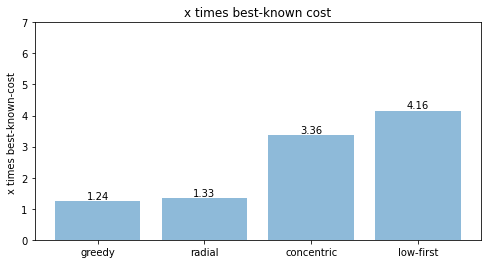

In [13]:
from matplotlib.pyplot import figure
objects = types
y_pos = np.arange(len(objects))
performance = [round((1+avg)*100)/100 for avg in avgjump]

plt.figure(figsize=(8,4))
fig = plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.bar_label(fig, performance)
plt.ylim(ymax = 7, ymin = 0)
plt.ylabel('x times best-known-cost ')
#plt.yscale("log")
plt.title('x times best-known cost')

plt.show()

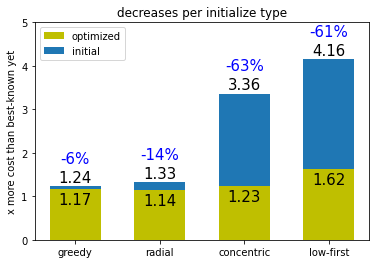

In [39]:
import matplotlib.pyplot as plt

labels = types
width = 0.6

fig, ax = plt.subplots()

og = ax.bar(labels, [1+avg for avg in avgjump], width, label='optimized', color='y')
opt = ax.bar(labels, [avgjumpopt[i]-avgjump[i] for i in range(len(avgjump))], width, bottom=[1+avg for avg in avgjump],
       label='initial')

ax.set_ylabel('x more cost than best-known yet')
ax.set_title('decreases per initialize type')
ax.legend()
#plt.yscale("log")
plt.ylim(ymax = 5, ymin = 0)

ax.bar_label(og, labels=[str(round((avgjumpopt[i]-avgjump[i])*100/(1+avgjump[i]))) + '%' for i in range(len(avgjump))],
             padding=20, color='b', fontsize=15)
ax.bar_label(og, labels=[round((1+avg)*100)/100 for avg in avgjump],
             padding=1, color='k', fontsize=15)
ax.bar_label(opt, labels=[round((1+avg)*100)/100 for avg in avgjumpopt],
             padding=3, color='k', fontsize=15)

plt.show()

## Percentage Optimization Cost per Initializing tactic

In [15]:
avgdrop = []
for type in types:
    diffs = [
        (eval['initial'][type][path] - eval['optimized'][type][path])/eval['initial'][type][path]
        for path in paths
    ]
    avgdrop.append(np.mean(diffs))
print('average drops in %')
print([round(avg*10000)/100 for avg in avgdrop])

average drops in %
[5.63, 14.17, 60.19, 58.26]


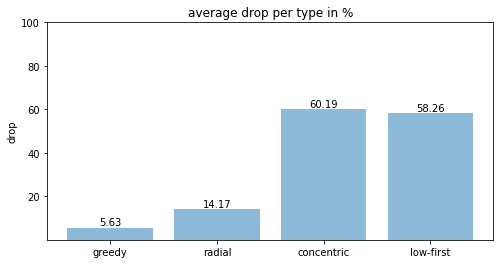

In [16]:
from matplotlib.pyplot import figure
objects = types
y_pos = np.arange(len(objects))
performance = [round(avg*10000)/100 for avg in avgdrop]

plt.figure(figsize=(8,4))
fig = plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.bar_label(fig, performance)
plt.ylim(ymax = 100, ymin = 0.01)
plt.ylabel('drop')
#plt.yscale("log")
plt.title('average drop per type in %')

plt.show()

## Cost per found string (chronologiclly)

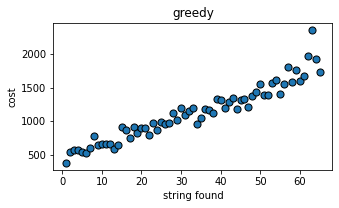

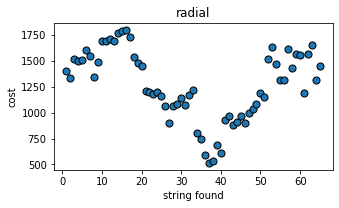

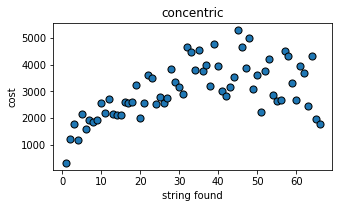

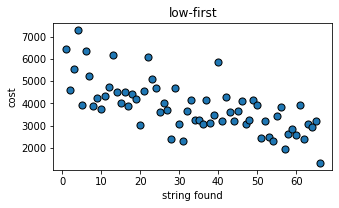

In [17]:
f = open('jsons/' + 'X-n429-k61' + '.json')
data = json.load(f)
distances = matrix.getDist(data['dimension'], data['x'], data['y'], euclidean.euc)
for type in types:
    visualise.visCost([cost.cost(distances, string) for string in data[type]['initial']['solution']], type)

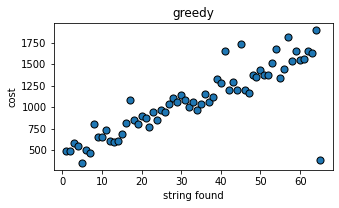

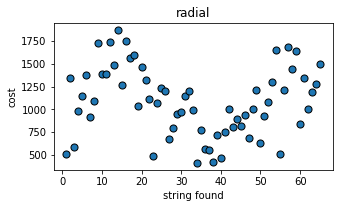

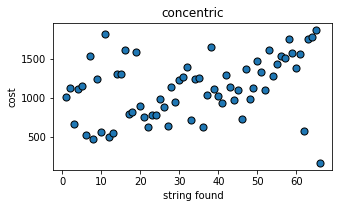

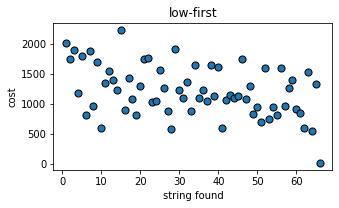

In [27]:
f = open('jsons/' + 'X-n429-k61' + '.json')
data = json.load(f)
distances = matrix.getDist(data['dimension'], data['x'], data['y'], euclidean.euc)
for type in types:
    visualise.visCost([cost.cost(distances, string) for string in data[type]['optimized']['solution']], type)

## Cumulative Cost Function

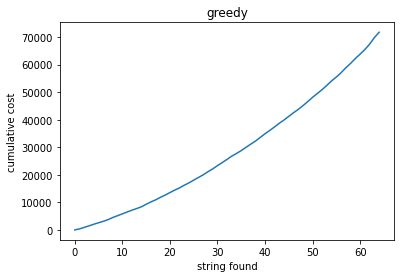

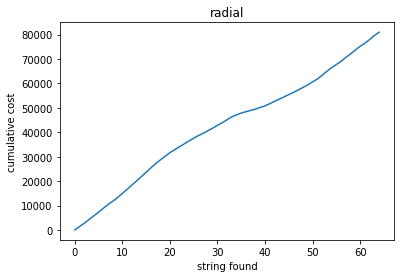

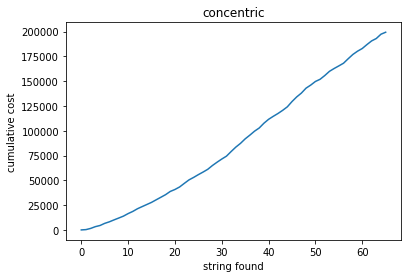

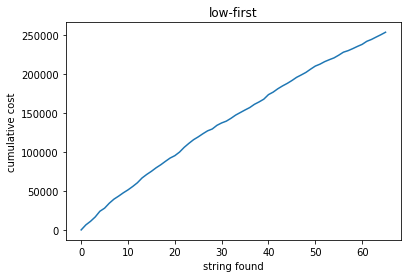

In [18]:
f = open('jsons/' + 'X-n429-k61' + '.json')
data = json.load(f)
distances = matrix.getDist(data['dimension'], data['x'], data['y'], euclidean.euc)
for type in types:
    visualise.visCostCum([cost.cost(distances, string) for string in data[type]['initial']['solution']], type)

## Cost VS Calculation Time

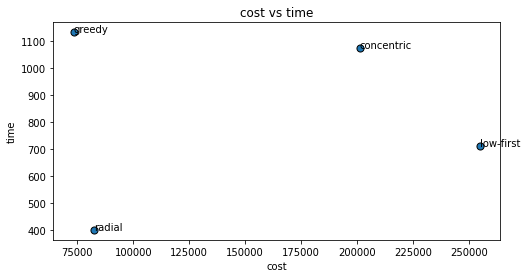

In [20]:
f = open('jsons/' + 'X-n429-k61' + '.json')
data = json.load(f)
costs = [data[type]['initial']['cost'] for type in types]
times = [data[type]['initial']['time'] for type in types]
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(costs, times, s=50, facecolor='C0', edgecolor='k', label=['1','2','3','4','5']);
plt.xlabel('cost')
plt.ylabel('time')
plt.title('cost vs time')
for i, label in enumerate(types):
    plt.annotate(label, (costs[i], times[i]))

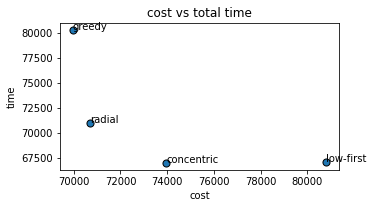

In [21]:
f = open('jsons/' + 'X-n429-k61' + '.json')
data = json.load(f)
costs = [data[type]['optimized']['cost'] for type in types]
times = [data[type]['initial']['time'] + data[type]['optimized']['time'] for type in types]
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(costs, times, s=50, facecolor='C0', edgecolor='k', label=['1','2','3','4','5']);
plt.xlabel('cost')
plt.ylabel('time')
plt.title('cost vs total time')
for i, label in enumerate(types):
    plt.annotate(label, (costs[i], times[i]))

## Visualize Strings, Initial VS Optimized

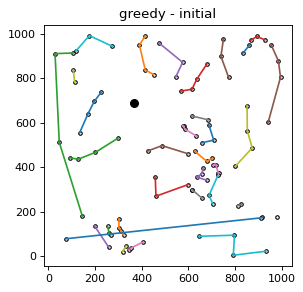

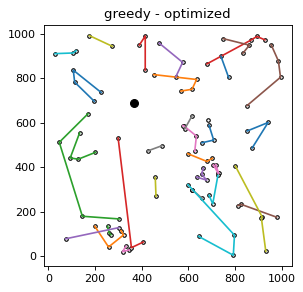

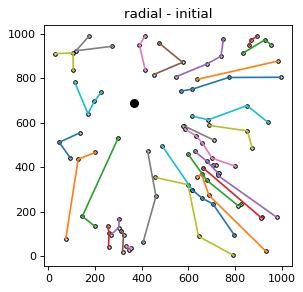

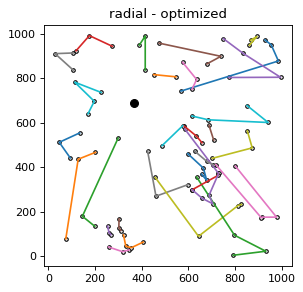

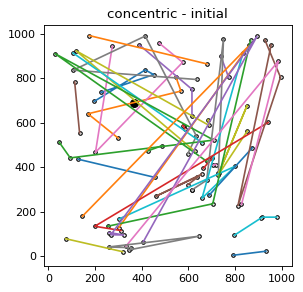

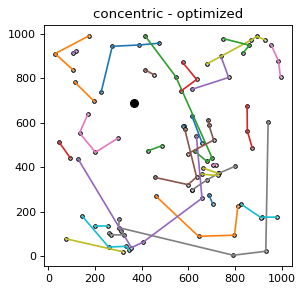

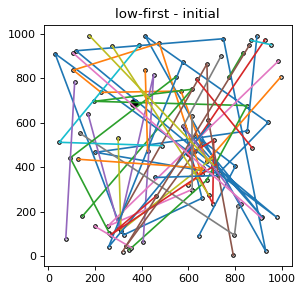

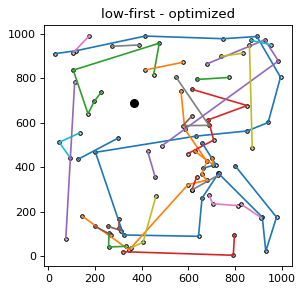

In [22]:
f = open('jsons/' + 'X-n101-k25' + '.json')
data = json.load(f)
x = data['x']
y = data['y']
initial = [data[type]['initial']['solution'] for type in types]
optimized = [data[type]['optimized']['solution'] for type in types]
for i in range(len(types)):
    visualise.paths(x, y, initial[i], types[i], False, False)
    visualise.paths(x, y, optimized[i], types[i], True, False)

62
65


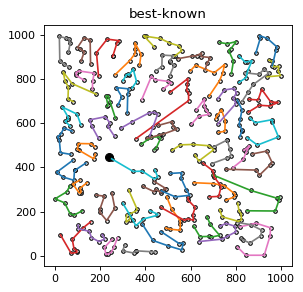

In [34]:
f = open('jsons/' + 'X-n429-k61' + '.json')
data = json.load(f)
x = data['x']
y = data['y']
best = data['best-known']

[sol.remove(1) for sol in best]
[sol.remove(1) for sol in best]

plt.figure(figsize=(4, 4), dpi=80)
plt.scatter([int(xi) for xi in x], [int(yi) for yi in y], s=10, facecolor='white', edgecolor='k')
plt.scatter(int(x[0]), int(y[0]), s=50, facecolor='k', edgecolor='k')
plt.title('best-known')

for string in best:
    xs = [int(x[xi-1]) for xi in string]
    ys = [int(y[yi-1]) for yi in string]
    plt.plot(xs,ys)
    
print(len(data['best-known']))
print(len(data['greedy']['optimized']['solution']))

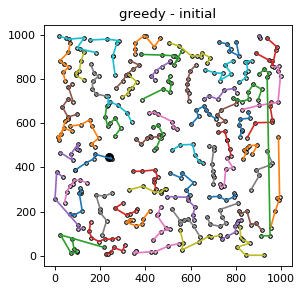

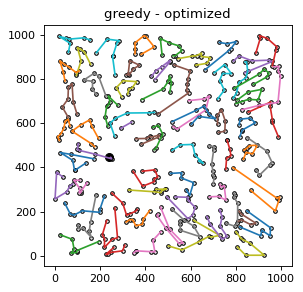

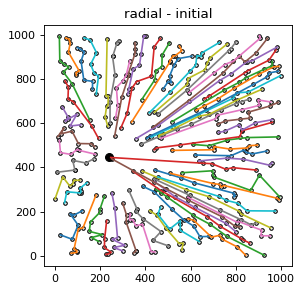

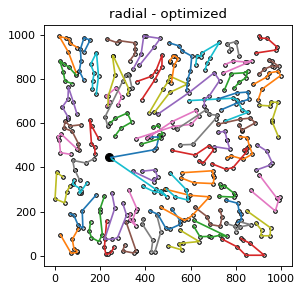

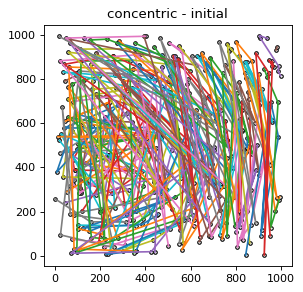

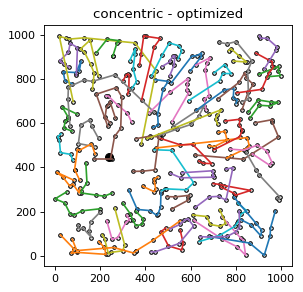

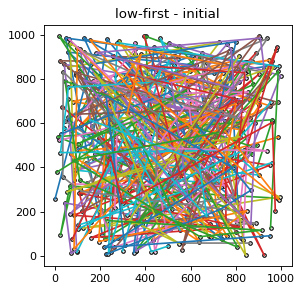

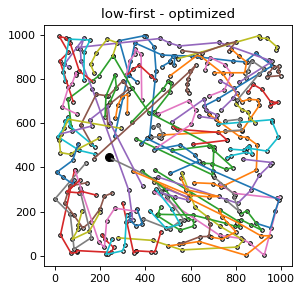

In [23]:
f = open('jsons/' + 'X-n429-k61' + '.json')
data = json.load(f)
x = data['x']
y = data['y']
initial = [data[type]['initial']['solution'] for type in types]
optimized = [data[type]['optimized']['solution'] for type in types]
for i in range(len(types)):
    visualise.paths(x, y, initial[i], types[i], False, False)
    visualise.paths(x, y, optimized[i], types[i], True, False)

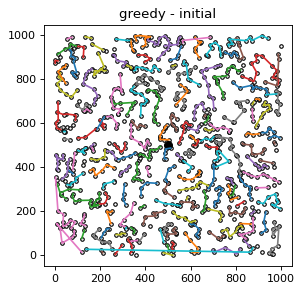

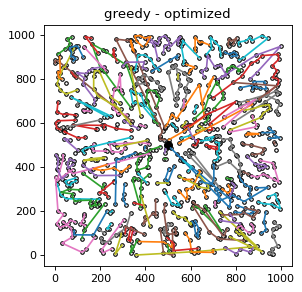

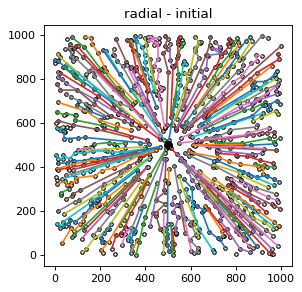

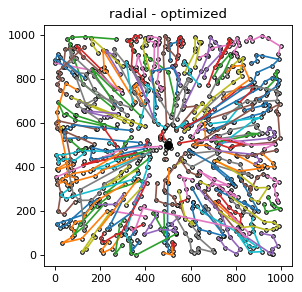

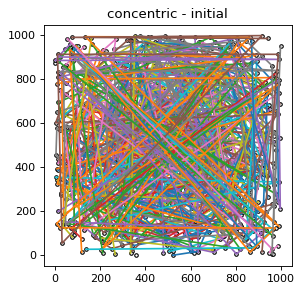

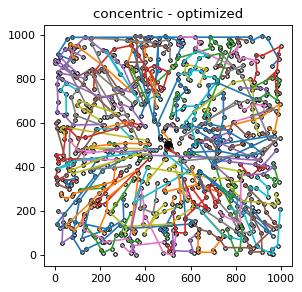

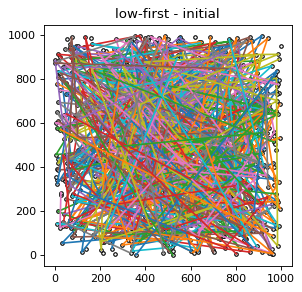

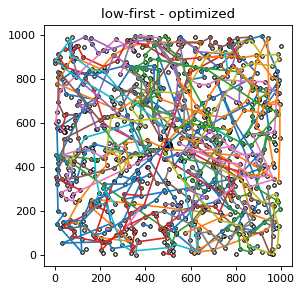

In [24]:
f = open('jsons/' + 'X-n936-k151' + '.json')
data = json.load(f)
x = data['x']
y = data['y']
initial = [data[type]['initial']['solution'] for type in types]
optimized = [data[type]['optimized']['solution'] for type in types]
for i in range(len(types)):
    visualise.paths(x, y, initial[i], types[i], False, False)
    visualise.paths(x, y, optimized[i], types[i], True, False)

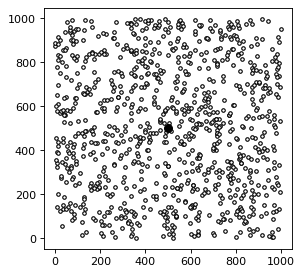

In [25]:
f = open('jsons/' + 'X-n936-k151' + '.json')
data = json.load(f)
x = data['x']
y = data['y']
best = [data['best-known'] for type in types]
plt.figure(figsize=(4, 4), dpi=80)
plt.scatter([int(xi) for xi in x], [int(yi) for yi in y], s=10, facecolor='white', edgecolor='k')
plt.scatter(int(x[0]), int(y[0]), s=50, facecolor='k', edgecolor='k')